# Context

There is a huge demand for used cars in the Indian Market today. As sales of new cars have slowed down in the recent past, the pre-owned car market has continued to grow over the past years and is larger than the new car market now. Cars4U is a budding tech start-up that aims to find footholes in this market.

In 2018-19, while new car sales were recorded at 3.6 million units, around 4 million second-hand cars were bought and sold. There is a slowdown in new car sales and that could mean that the demand is shifting towards the pre-owned market. In fact, some car sellers replace their old cars with pre-owned cars instead of buying new ones. Unlike new cars, where price and supply are fairly deterministic and managed by OEMs (Original Equipment Manufacturer / except for dealership level discounts which come into play only in the last stage of the customer journey), used cars are very different beasts with huge uncertainty in both pricing and supply. Keeping this in mind, the pricing scheme of these used cars becomes important in order to grow in the market.

As a senior data scientist at Cars4U, you have to come up with a pricing model that can effectively predict the price of used cars and can help the business in devising profitable strategies using differential pricing. For example, if the business knows the market price, it will never sell anything below it.

 

Objective
To explore and visualize the dataset, build a linear regression model to predict the prices of used cars, and generate a set of insights and recommendations that will help the business.

 

Data Description
The data contains the different attributes of used cars sold in different locations. The detailed data dictionary is given below.

Data Dictionary

S.No.: Serial number
Name: Name of the car which includes brand name and model name
Location: Location in which the car is being sold or is available for purchase (cities)
Year: Manufacturing year of the car
Kilometers_driven: The total kilometers driven in the car by the previous owner(s) in km
Fuel_Type: The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG)
Transmission: The type of transmission used by the car (Automatic/Manual)
Owner: Type of ownership
Mileage: The standard mileage offered by the car company in kmpl or km/kg
Engine: The displacement volume of the engine in CC
Power: The maximum power of the engine in bhp
Seats: The number of seats in the car
New_Price: The price of a new car of the same model in INR Lakhs (1 Lakh INR = 100,000 INR)
Price: The price of the used car in INR Lakhs
 

Problem Statement: Market price prediction for used cars
Potential Questions to be answered:-
    Used car value prediction based on 
        1) Price
        2) Location
        3) Transmission
        4) Fuel Type

# Import necessary packages 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

import warnings
warnings.filterwarnings("ignore")

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# To build linear model for prediction
from sklearn.linear_model import LinearRegression

# To check model performance
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Loading and Exploratory data analysis

In [2]:
data = pd.read_csv("used_cars_data.csv")
# creating a copy of the data so that original data remains unchanged
df = data.copy()

In [3]:
#Number of rows and columns in the dataset
df.shape

(7253, 14)

In [4]:
#column details
print(df.columns)

Index(['S.No.', 'Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price'],
      dtype='object')


In [5]:
#Check missing values in each column
df.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
New_Price            6247
Price                1234
dtype: int64

The new price column has most missing values in the dataset. Price column also have considerable missing values

In [6]:
#check for any duplicate records
df.duplicated().sum()

0

There are no duplicate records in the dataset

In [7]:
#Understanding each colum datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7078 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


    There are many numeric (float and int type) and string (object type) columns in the data.
    Dependent variable is the price of an used car, which is of float type.

In [8]:
#Checking sample data
np.random.seed(1)
df.sample(5)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
2397,2397,Ford EcoSport 1.5 Petrol Trend,Kolkata,2016,21460,Petrol,Manual,First,17.0 kmpl,1497 CC,121.36 bhp,5.0,9.47 Lakh,6.00
3777,3777,Maruti Wagon R VXI 1.2,Kochi,2015,49818,Petrol,Manual,First,21.5 kmpl,1197 CC,81.80 bhp,5.0,5.44 Lakh,4.11
4425,4425,Ford Endeavour 4x2 XLT,Hyderabad,2007,130000,Diesel,Manual,First,13.1 kmpl,2499 CC,141 bhp,7.0,NaN,6.00
3661,3661,Mercedes-Benz E-Class E250 CDI Avantgrade,Coimbatore,2016,39753,Diesel,Automatic,First,13.0 kmpl,2143 CC,201.1 bhp,5.0,NaN,35.28
4514,4514,Hyundai Xcent 1.2 Kappa AT SX Option,Kochi,2016,45560,Petrol,Automatic,First,16.9 kmpl,1197 CC,82 bhp,5.0,NaN,6.34


In [9]:
df.describe()

,S.No.,Year,Kilometers_Driven,Seats,Price
count,7253.000000,7253.000000,7.253000e+03,7200.000000,6019.000000
mean,3626.000000,2013.365366,5.869906e+04,5.279722,9.479468
std,2093.905084,3.254421,8.442772e+04,0.811660,11.187917
min,0.000000,1996.000000,1.710000e+02,0.000000,0.440000
25%,1813.000000,2011.000000,3.400000e+04,5.000000,3.500000
50%,3626.000000,2014.000000,5.341600e+04,5.000000,5.640000
75%,5439.000000,2016.000000,7.300000e+04,5.000000,9.950000
max,7252.000000,2019.000000,6.500000e+06,10.000000,160.000000


Let us look at some of the Categorical data

In [10]:
#Unique location
df['Location'].unique()

array(['Mumbai', 'Pune', 'Chennai', 'Coimbatore', 'Hyderabad', 'Jaipur',
       'Kochi', 'Kolkata', 'Delhi', 'Bangalore', 'Ahmedabad'],
      dtype=object)

In [11]:
#Avilable used cars by location
df['Location'].value_counts()

Mumbai        949
Hyderabad     876
Kochi         772
Coimbatore    772
Pune          765
Delhi         660
Kolkata       654
Chennai       591
Jaipur        499
Bangalore     440
Ahmedabad     275
Name: Location, dtype: int64

Used cars are sold in 11 diffrent markets. Mumbai has highest number used cars supply

In [12]:
df['Fuel_Type'].unique()

array(['CNG', 'Diesel', 'Petrol', 'LPG', 'Electric'], dtype=object)

In [13]:
df['Fuel_Type'].value_counts()

Diesel      3852
Petrol      3325
CNG           62
LPG           12
Electric       2
Name: Fuel_Type, dtype: int64

There are four diffrent fuel_type and most cars use either Diesel or Petrol as fuel

In [14]:
df['Transmission'].value_counts()

Manual       5204
Automatic    2049
Name: Transmission, dtype: int64

Most cars are with manual transmission

Let us look at few numerical columns data

In [15]:
df['Seats'].unique()

array([ 5.,  7.,  8.,  4.,  6.,  2., nan, 10.,  9.,  0.])

In [16]:
df['Seats'].value_counts()

5.0     6047
7.0      796
8.0      170
4.0      119
6.0       38
2.0       18
10.0       8
9.0        3
0.0        1
Name: Seats, dtype: int64

Most cars are 5 seaters. Few cars have highest number of 10 seats

# Data Preprocessing

Missing value treatement
    1) Drop S.No as that is not going to be matched with anything
    3) Drop Name as there are too many models.Other variables good enough to create model and predict price
    3) Price of the car increases for more engine and power capacity which impacts mileage. Keep Power and Engine but drop Mileage
    4) Drop New_Price as it has most missing values
If the price of the car is increasing that means the engine and the power capacity also increases which impacts the mileage of the car. So a negative relation makes sense here.


In [18]:
df.drop(['S.No.','New_Price','Mileage','Name'], axis=1,inplace=True)

In [19]:
# let us reset the dataframe index
df.reset_index(inplace=True, drop=True)

Treating Price column
As this is target variable, we will drop the missing values. 

In [20]:
df.dropna(subset=["Price"], inplace=True)

Treating Seats Column

In [21]:
df['Seats'].median()

5.0

In [22]:
df['Seats'].value_counts()

5.0     5014
7.0      674
8.0      134
4.0       99
6.0       31
2.0       16
10.0       5
9.0        3
0.0        1
Name: Seats, dtype: int64

In [23]:
df['Seats'].isnull().sum()

42

Considering only small number of cars have missing seats values and most cars are 5 seater, let us use that to fill missing values

In [24]:
#df.dropna(subset=["Seats"], inplace=True)
df['Seats'].fillna(float(df['Seats'].median()), inplace=True)

Treating Power and Milegae Column - Convert both to numerical as unit label is not significant

In [25]:
def position_to_num(pos_val):
    """For each value, take the number before the '' to remove unit label
    unless it is not a string value. This will only happen
    for NaNs so in that case we just return NaN.
    """
    if isinstance(pos_val, str):
        return float(pos_val.split(' ')[0])
    else:
        return np.nan

position_cols = ['Engine','Power']

for colname in position_cols:
    df[colname] = df[colname].apply(position_to_num)


Treating missing values with average value for Power and Engine column

In [26]:
df['Power'].fillna(float(df['Power'].mean()), inplace=True)

In [27]:
df['Engine'].fillna(float(df['Engine'].mean()), inplace=True)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6019 entries, 0 to 6018
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           6019 non-null   object 
 1   Year               6019 non-null   int64  
 2   Kilometers_Driven  6019 non-null   int64  
 3   Fuel_Type          6019 non-null   object 
 4   Transmission       6019 non-null   object 
 5   Owner_Type         6019 non-null   object 
 6   Engine             6019 non-null   float64
 7   Power              6019 non-null   float64
 8   Seats              6019 non-null   float64
 9   Price              6019 non-null   float64
dtypes: float64(4), int64(2), object(4)
memory usage: 517.3+ KB


In [29]:
df2 = df.copy()

In [30]:
df2.shape

(6019, 10)

In [31]:
df2.isnull().sum()

Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

    Univariate Analysis

In [32]:
# While doing univariate analysis of numerical variables we want to study their central tendency and dispersion.
# Let us write a function that will help us create a boxplot and a histogram for any input numerical variable.
# This function takes the numerical column as the input and returns the boxplots and histograms for the variable.
# Let us see if this helps us write faster and cleaner code.


def histogram_boxplot(feature, figsize=(15, 10), bins=None):
    """Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(
        feature, kde=F, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.distplot(
        feature, kde=False, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        feature.mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        feature.median(), color="black", linestyle="-"
    )  # Add median to the histogram

Price- Target variable

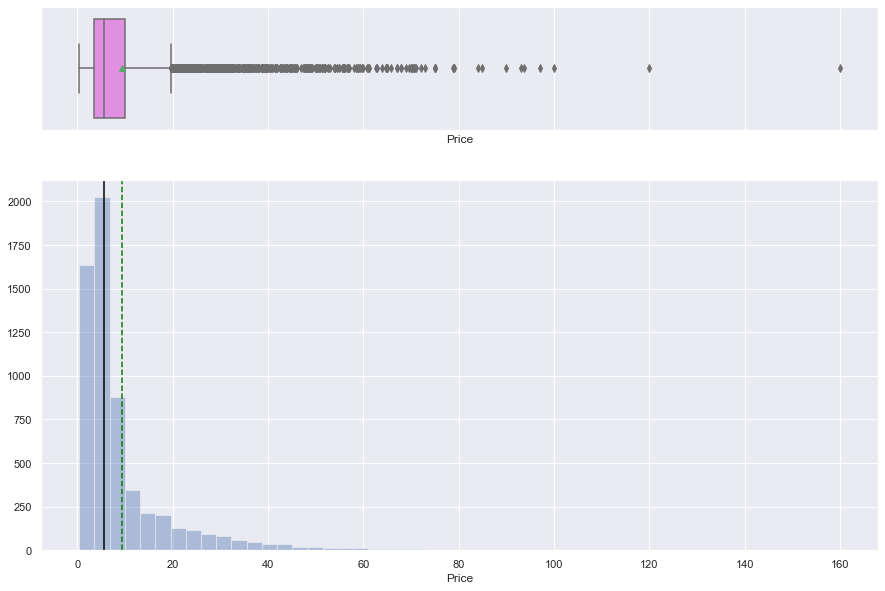

In [33]:
histogram_boxplot(df2["Price"])

Car prices are right skewed

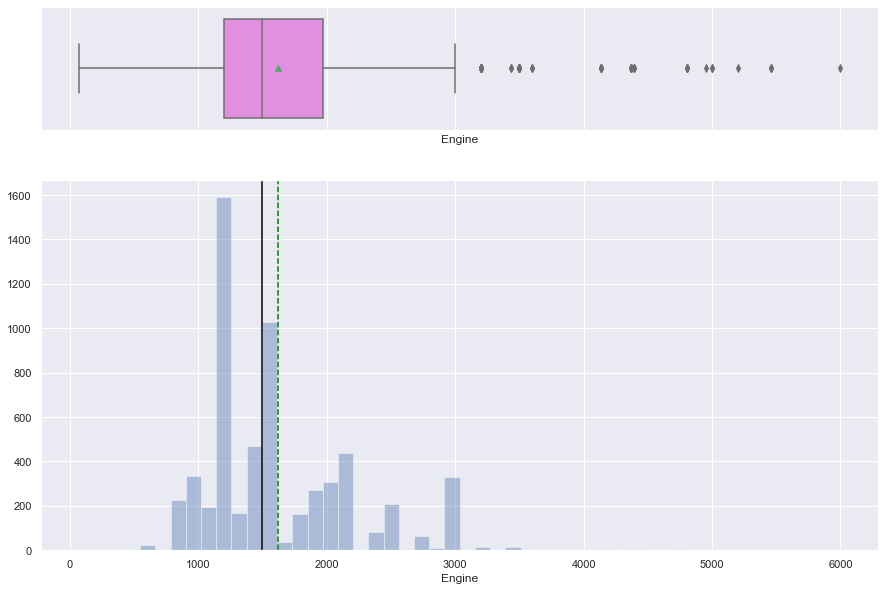

In [34]:
histogram_boxplot(df2["Engine"])

Most of the Engine capacity falls between around 800 to 3000

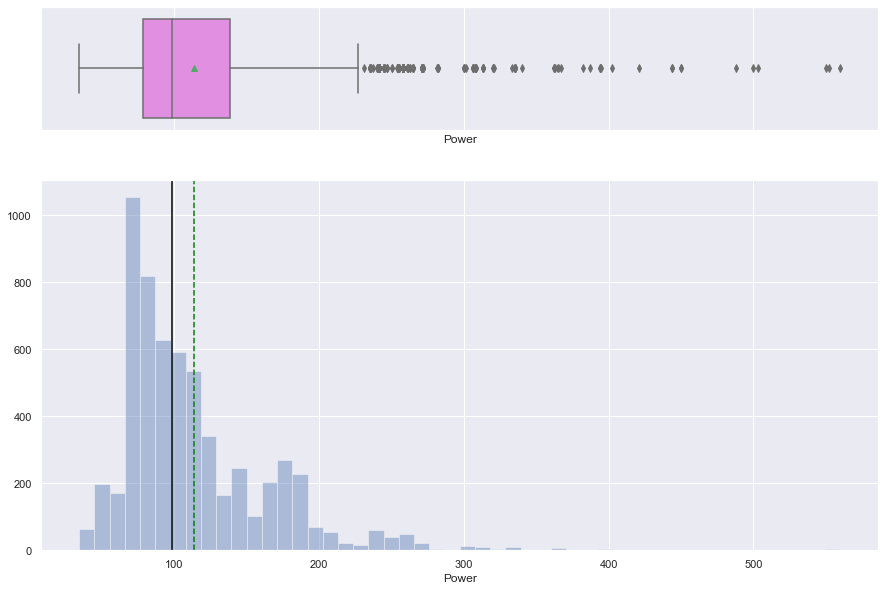

In [35]:
histogram_boxplot(df2["Power"])

In [ ]:
Power distribution looks right skewed

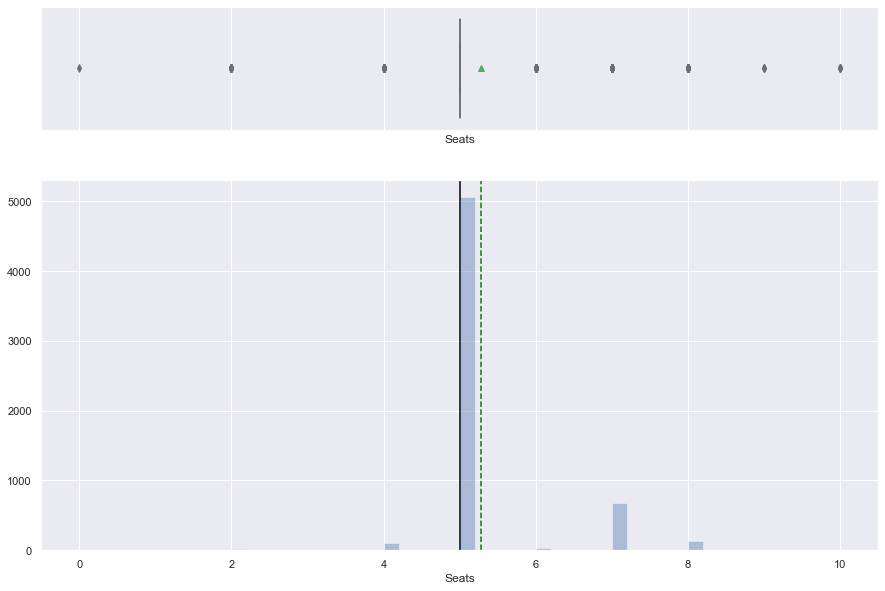

In [36]:
histogram_boxplot(df2["Seats"])

In [ ]:
Cars seats count fall between 4 and 10 and most have at least 5 seats

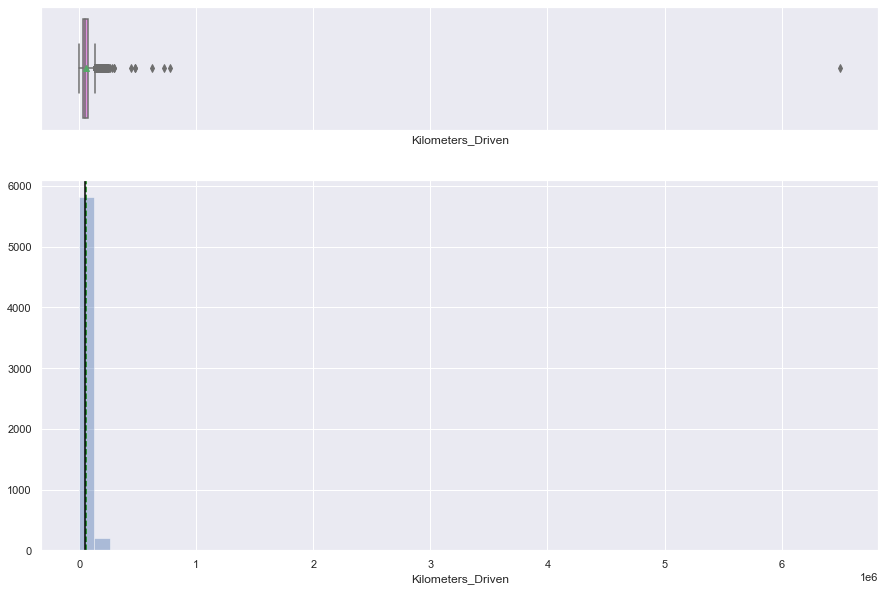

In [37]:
histogram_boxplot(df2["Kilometers_Driven"])

The distribution is heavily right skewed

In [38]:
# Function to create barplots that indicate percentage for each category.


def perc_on_bar(data, z):
    """
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    """

    total = len(data[z])  # length of the column
    plt.figure(figsize=(15, 5))
    plt.xticks(rotation=45)
    ax = sns.countplot(data[z], palette="Paired")
    for p in ax.patches:
        percentage = "{:.1f}%".format(
            100 * p.get_height() / total
        )  # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05  # width of the plot
        y = p.get_y() + p.get_height()  # hieght of the plot

        ax.annotate(percentage, (x, y), size=10)  # annotate the percantage
    plt.show()  # show the plot

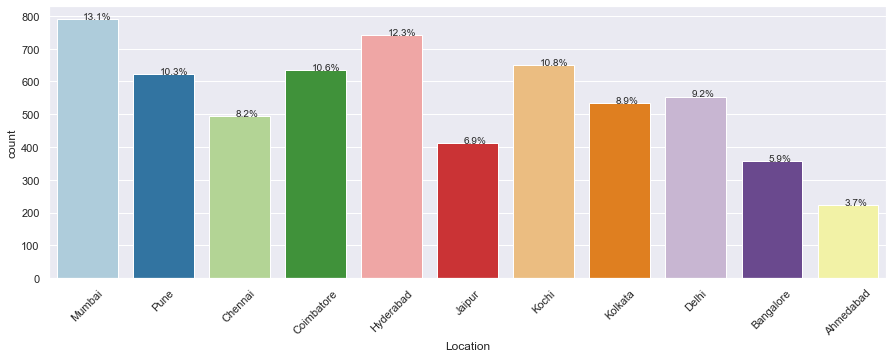

In [39]:
perc_on_bar(df2, "Location")

More used cars are available in Mumbai market and least number is located in Ahmedabad

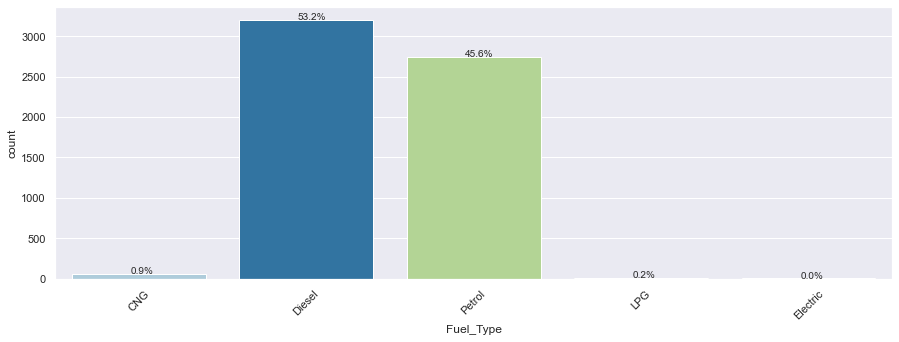

In [40]:
perc_on_bar(df2, "Fuel_Type")

Most of the cars use Diesel or Petrol 

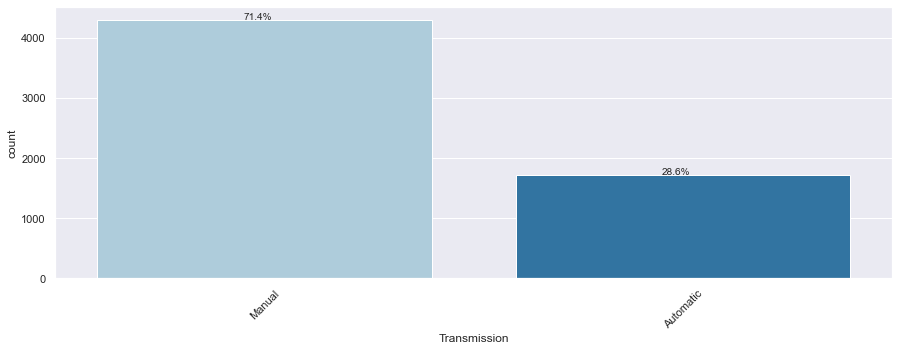

In [41]:
perc_on_bar(df2, "Transmission")

Most cars have manual transmission 

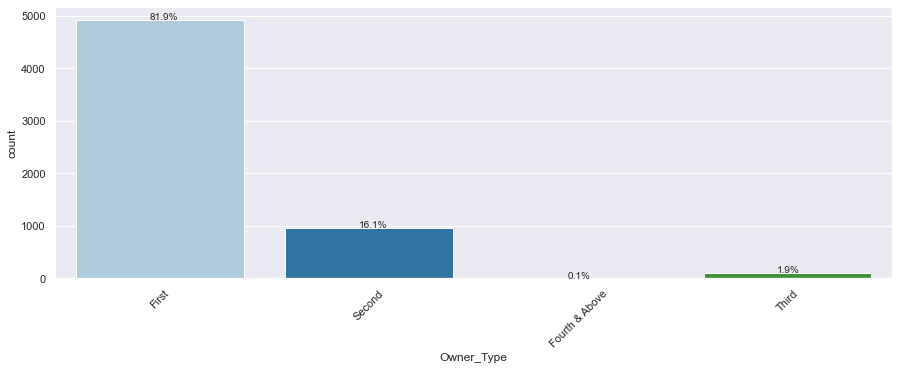

In [43]:
perc_on_bar(df2, "Owner_Type")

When it comes to previous ownership most cars coming from first ownership

Bivariate Analysis

To see correlation between all numerical variables

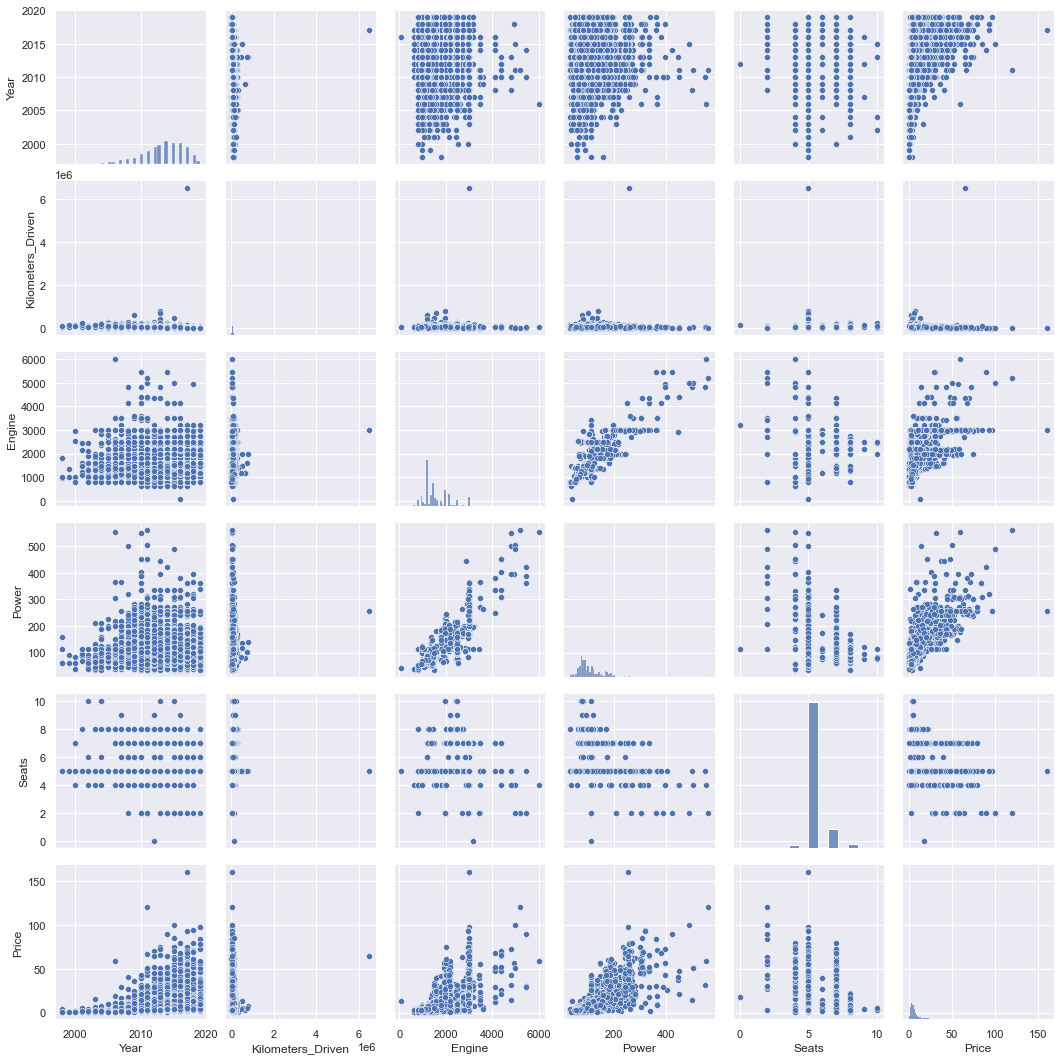

In [46]:
sns.pairplot(df2)

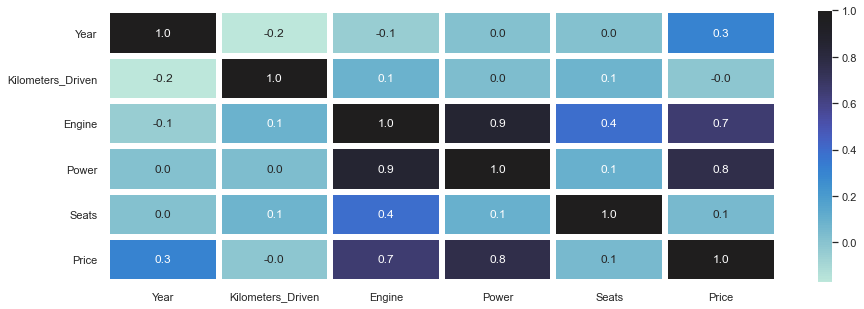

In [47]:
plt.figure(figsize=(15,5))
sns.heatmap(df2.corr(),annot=True,linewidths=5, fmt='.1f',center=1)
plt.show()

Price and Power columns are highly correlated.
Price and Engine CC are highly correlated.

Checking price variation with categorical columns

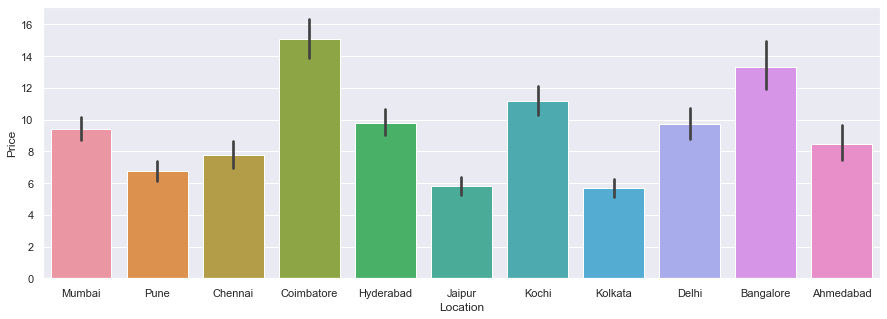

In [48]:
plt.figure(figsize=(15, 5))
sns.barplot(x="Location", y="Price", data=df2);

In [ ]:
Coimbatore market provides more price for used cars

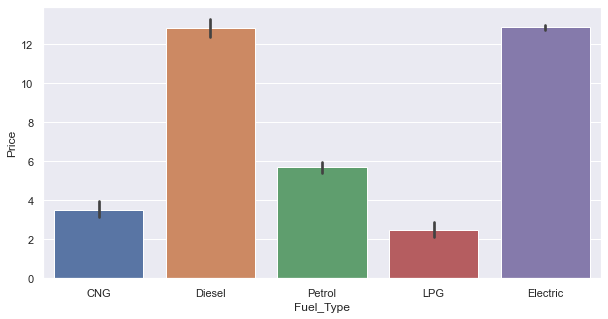

In [49]:
plt.figure(figsize=(10, 5))
sns.barplot(x="Fuel_Type", y="Price", data=df2);

In [ ]:
Both Diesel and Electric cars get more price

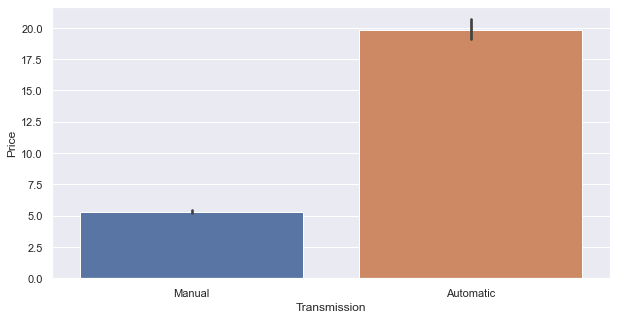

In [50]:
plt.figure(figsize=(10, 5))
sns.barplot(x="Transmission", y="Price", data=df2);

Automatic transmission cars sells at higher price point

In [ ]:
Identifying outliers using IQR and applying to data

In [51]:
df3 = df2.copy()
quartiles = np.quantile(df3['Power'][df3['Power'].notnull()], [.25, .75])
power_4iqr = 4 * (quartiles[1] - quartiles[0])
print(f'Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 4*IQR = {power_4iqr}')
outlier_powers = df3.loc[np.abs(df3['Power'] - df3['Power'].median()) > power_4iqr, 'Power']
#outlier_powers

Q1 = 78.0, Q3 = 138.03, 4*IQR = 240.12


In [52]:
df3.drop(outlier_powers.index, axis=0, inplace=True)

In [53]:
#data before treating outlier
df2.shape

(6019, 10)

In [54]:
#data after treating outlier
df3.shape

(5994, 10)

# Feature Engineering

In [56]:
capacity_cols = ['Engine','Power']

In [57]:
# Number of columns are not that high but we can still do some feature engineering combining Engine and Power 
# as correlation between them close to one
# replacing the Power and Engine columns with averages to reduce dataset dimension
positiontype_to_cols = {'Capacity': ['Engine','Power']}

for pos_type, colvec in positiontype_to_cols.items():
    df3[pos_type + '_data'] = round(df[colvec].mean(axis=1))

# we've summarized these and are content with these aggregates so we drop these columns
df3.drop(capacity_cols, axis=1, inplace=True)

print(df3.shape) 

(5994, 9)


In [58]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5994 entries, 0 to 6018
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           5994 non-null   object 
 1   Year               5994 non-null   int64  
 2   Kilometers_Driven  5994 non-null   int64  
 3   Fuel_Type          5994 non-null   object 
 4   Transmission       5994 non-null   object 
 5   Owner_Type         5994 non-null   object 
 6   Seats              5994 non-null   float64
 7   Price              5994 non-null   float64
 8   Capacity_data      5994 non-null   float64
dtypes: float64(3), int64(2), object(4)
memory usage: 468.3+ KB


Most of the columns have a skewed distribution

In [59]:
df3.describe()

,Year,Kilometers_Driven,Seats,Price,Capacity_data
count,5994.000000,5.994000e+03,5994.000000,5994.000000,5994.000000
mean,2013.363697,5.883690e+04,5.282449,9.321198,861.028862
std,3.265164,9.143259e+04,0.799718,10.769126,307.194439
min,1998.000000,1.710000e+02,0.000000,0.440000,56.000000
25%,2011.000000,3.400000e+04,5.000000,3.500000,640.000000
50%,2014.000000,5.315800e+04,5.000000,5.600000,792.000000
75%,2016.000000,7.300000e+04,5.000000,9.857500,1071.000000
max,2019.000000,6.500000e+06,10.000000,160.000000,2351.000000


Variable Transformations

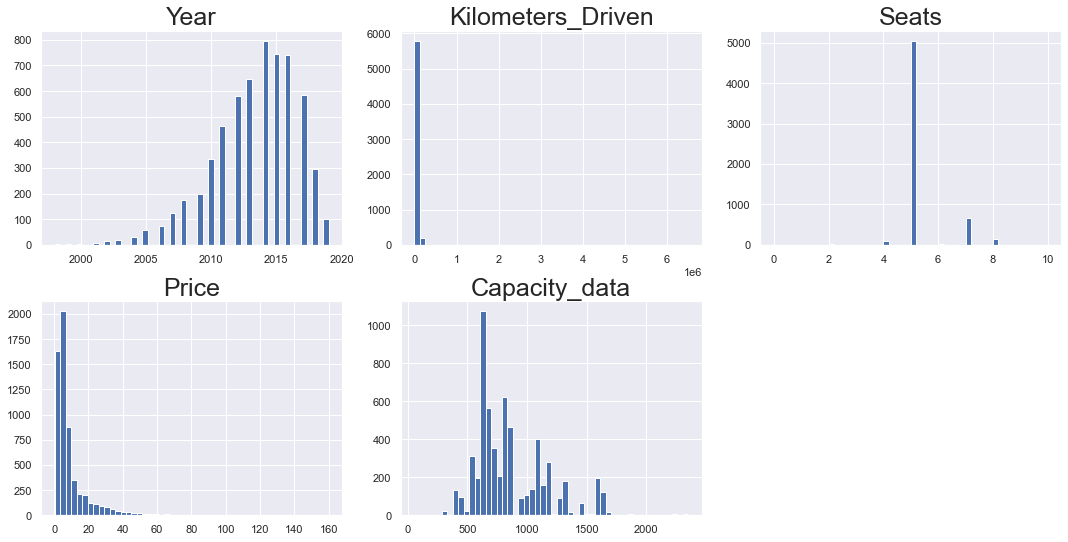

In [60]:
# creating a list of non-tag columns
dist_cols = [
    item for item in df3.select_dtypes(include=np.number).columns 
]

# let's plot a histogram of all non-tag columns

plt.figure(figsize=(15, 45))

for i in range(len(dist_cols)):
    plt.subplot(12, 3, i + 1)
    plt.hist(df3[dist_cols[i]], bins=50)
    #sns.histplot(data=df3, x=dist_cols[i], kde=True)  # you can comment the previous line and run this one to get distribution curves
    plt.tight_layout()
    plt.title(dist_cols[i], fontsize=25)

plt.show()

In [ ]:
Price, Kilometers_Driven are rightly skewed. Year and Capacity data almost normaly distributed

apply the log transformation

In [61]:
# creating a copy of the dataframe
df4 = df3.copy()
# removing Seats as they have minimal number of values
dist_cols.remove("Seats")
#dist_cols.remove("Kilometers_Driven")
# also dropping the Year and Price column 
dist_cols.remove("Year")
dist_cols.remove("Price")

In [62]:
# using log transforms on some columns
for col in dist_cols:
    df4[col + "_log"] = np.log(df4[col] + 1)

# dropping the original columns
df4.drop(dist_cols, axis=1, inplace=True)
df4.head()

,Location,Year,Fuel_Type,Transmission,Owner_Type,Seats,Price,Kilometers_Driven_log,Capacity_data_log
0,Mumbai,2010,CNG,Manual,First,5.0,1.75,11.184435,6.270988
1,Pune,2015,Diesel,Manual,First,5.0,12.50,10.621352,6.751101
2,Chennai,2011,Petrol,Manual,First,5.0,4.50,10.736418,6.469250
3,Chennai,2012,Diesel,Manual,First,7.0,6.00,11.373675,6.505784
4,Coimbatore,2013,Diesel,Automatic,Second,5.0,17.74,10.613271,6.961296


In [ ]:
dist_cols

Let's check for skewness after applying the log transformation.

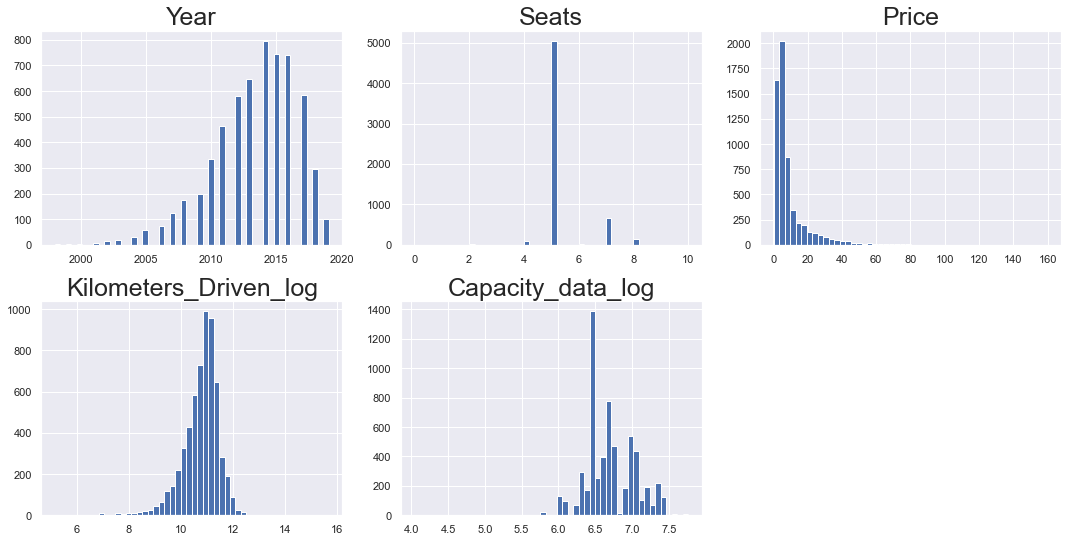

In [63]:
# creating a list of columns
dist_cols = [
    item for item in df4.select_dtypes(include=np.number).columns 
]

# let's plot histogram of all columns

plt.figure(figsize=(15, 45))

for i in range(len(dist_cols)):
    plt.subplot(12, 3, i + 1)
    plt.hist(df4[dist_cols[i]], bins=50)
    #sns.histplot(data=df4, x=dist_cols[i], kde=True)  # you can comment the previous line and run this one to get distribution curves
    plt.tight_layout()
    plt.title(dist_cols[i], fontsize=25)

plt.show()

The columns are still skewed, but not as heavily as before.

df3.drop(["Engine_log"], axis=1, inplace=True)
df3.shape

In [64]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5994 entries, 0 to 6018
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Location               5994 non-null   object 
 1   Year                   5994 non-null   int64  
 2   Fuel_Type              5994 non-null   object 
 3   Transmission           5994 non-null   object 
 4   Owner_Type             5994 non-null   object 
 5   Seats                  5994 non-null   float64
 6   Price                  5994 non-null   float64
 7   Kilometers_Driven_log  5994 non-null   float64
 8   Capacity_data_log      5994 non-null   float64
dtypes: float64(4), int64(1), object(4)
memory usage: 468.3+ KB


# Model Building

In [65]:
ind_vars = df4.drop(["Price"], axis=1)
dep_var = df4[["Price"]]

Create Dummy Variables

In [66]:
def encode_cat_vars(x):
    x = pd.get_dummies(
        x,
        columns=x.select_dtypes(include=["object", "category"]).columns.tolist(),
        drop_first=True,
    )
    return x


ind_vars_num = encode_cat_vars(ind_vars)
ind_vars_num.head()

,Year,Seats,Kilometers_Driven_log,Capacity_data_log,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,2010,5.0,11.184435,6.270988,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
1,2015,5.0,10.621352,6.751101,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0
2,2011,5.0,10.736418,6.469250,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
3,2012,7.0,11.373675,6.505784,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
4,2013,5.0,10.613271,6.961296,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


Split the data into train and test

In [67]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    ind_vars_num, dep_var, test_size=0.3, random_state=1
)

In [68]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in train data =", x_test.shape[0])

Number of rows in train data = 4195
Number of rows in train data = 1799


Fitting a linear model

In [69]:
lin_reg_model = LinearRegression()
lin_reg_model.fit(x_train, y_train)

LinearRegression()

Let us check the coefficients and intercept of the model, which are the parameters we learned.

In [70]:
coef_df = pd.DataFrame(
    np.append(lin_reg_model.coef_.flatten(), lin_reg_model.intercept_),
    index=x_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)
coef_df

,Coefficients
Year,0.647029
Seats,-1.406560
Kilometers_Driven_log,-2.438246
Capacity_data_log,16.525495
Location_Bangalore,2.444569
Location_Chennai,0.590346
Location_Coimbatore,2.977102
Location_Delhi,-0.156466
Location_Hyderabad,1.508017
Location_Jaipur,1.172737


Coefficient interpretations

In [ ]:
* Coefficients of log of capacity, most locations except Delhi,Kolkata, Mumbai, Electric and LPG Cars are positive. 
  * Increase in these variables will get more price for cars

*Coefficients of Seats,more mileage driven, Manual Transmission etc., are negative.
  * Increase in these will lead to a decrease in used car price.

In [ ]:
Model performance check

In [74]:
# Adjusted R^2
def adj_r2(ind_vars, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = ind_vars.shape[0]
    k = ind_vars.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# Model performance check
def model_perf(model, inp, out):

    y_pred = model.predict(inp)
    y_act = out.values

    return pd.DataFrame(
        {
            "RMSE": np.sqrt(mean_squared_error(y_act, y_pred)),
            "MAE": mean_absolute_error(y_act, y_pred),
            "R^2": r2_score(y_act, y_pred),
            "Adjusted R^2": adj_r2(inp, y_act, y_pred),
        },
        index=[0],
    )

In [76]:
# Checking model performance on train set
print("Training Performance\n")
print(model_perf(lin_reg_model, x_train, y_train))

# Checking model performance on test set
print("\n\nTest Performance\n")
print(model_perf(lin_reg_model, x_test, y_test))

Training Performance

       RMSE       MAE       R^2  Adjusted R^2
0  6.341988  3.993137  0.627538      0.625574


Test Performance

       RMSE       MAE       R^2  Adjusted R^2
0  7.334981  4.240308  0.599949      0.594993


In [ ]:
Observations

The train and test  𝑅2  are 0.63 and 0.59, indicating that the model explains 63% and 59% of the total variation in the train and test sets respectively. Also, both scores are comparable.

train and test sets RMSE are also comparable. This shows that the model is not overfitting.

MAE indicates that our current model is able to predict used car price within a mean error of 4.24 on the test set.

Overall this model performance better help car price prediction

In [ ]:
Conclusions

We were able to build a prediction model with given data that will be helpful for Cars4U

Location like Coimbatore and Bangalore can get good price for used cars

Cars with Automatic Transmission  will also sell for higher price

Most cars available with Diesel or Petrol but Electric car will get better price in the market

Less Driven Cars are also will get higher price

Major Market by volume is Mumbai. Adjusting volume with high price markets like Coimbatore and Bangalore will bring more margin to Cars4U

Focusing more automatic and electric cars sales also bring more benefits